In [ ]:
#Import library
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving shopping_trends.csv to shopping_trends.csv


In [ ]:
data = pd.read_csv('shopping_trends.csv')
print (data)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

In [ ]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
data.tail(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,No,No,33,Venmo,Quarterly


In [ ]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
#mengecek missing value
data.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [ ]:
np.sum(data.isnull())

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [ ]:
data.columns.tolist()

['Customer ID',
 'Age',
 'Gender',
 'Item Purchased',
 'Category',
 'Purchase Amount (USD)',
 'Location',
 'Size',
 'Color',
 'Season',
 'Review Rating',
 'Subscription Status',
 'Payment Method',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Previous Purchases',
 'Preferred Payment Method',
 'Frequency of Purchases']

In [ ]:
pc_counts = data['Purchase Amount (USD)'].value_counts(sort=False)
print(pc_counts)

Purchase Amount (USD)
53    51
64    53
73    51
90    60
49    35
      ..
66    49
44    50
52    44
71    53
63    54
Name: count, Length: 81, dtype: int64


In [ ]:
# Menghitung jumlah masing-masing nilai dan mengurutkan berdasarkan nilai kemunculan
frequency_counts_sorted = data['Frequency of Purchases'].value_counts(sort=False)

print(frequency_counts_sorted)

Frequency of Purchases
Fortnightly       542
Weekly            539
Annually          572
Quarterly         563
Bi-Weekly         547
Monthly           553
Every 3 Months    584
Name: count, dtype: int64


Fortnightly (Setiap Dua Minggu): 542 pelanggan melakukan pembelian setiap dua minggu sekali.

Weekly (Mingguan): 539 pelanggan melakukan pembelian setiap minggu.

Annually (Tahunan): 572 pelanggan melakukan pembelian setiap tahun.

Quarterly (Triwulanan): 563 pelanggan melakukan pembelian setiap tiga bulan sekali.

Bi-Weekly (Dua Mingguan): 547 pelanggan melakukan pembelian setiap dua minggu sekali (sama seperti Fortnightly).

Monthly (Bulanan): 553 pelanggan melakukan pembelian setiap bulan.

Every 3 Months (Setiap 3 Bulan): 584 pelanggan melakukan pembelian setiap tiga bulan sekali (sama seperti Quarterly).

In [ ]:
# Menyamakan istilah 'Fortnightly' dan 'Bi-Weekly'
data['Frequency of Purchases'] = data['Frequency of Purchases'].replace({'Bi-Weekly': 'Fortnightly'})
data['Frequency of Purchases'] = data['Frequency of Purchases'].replace({'Every 3 Months': 'Quarterly'})

# Menghitung jumlah masing-masing nilai dalam kolom 'Frequency of Purchases'
frequency_counts = data['Frequency of Purchases'].value_counts()

print(frequency_counts)

Frequency of Purchases
Quarterly      1147
Fortnightly    1089
Annually        572
Monthly         553
Weekly          539
Name: count, dtype: int64


In [ ]:
data['Frequency of Purchases'] = data['Frequency of Purchases'].replace({'Bi-Weekly': 'Fortnightly', 'Every 3 Months': 'Quarterly'})

In [ ]:
grouped_data = data.groupby('Frequency of Purchases')['Age'].mean().reset_index()

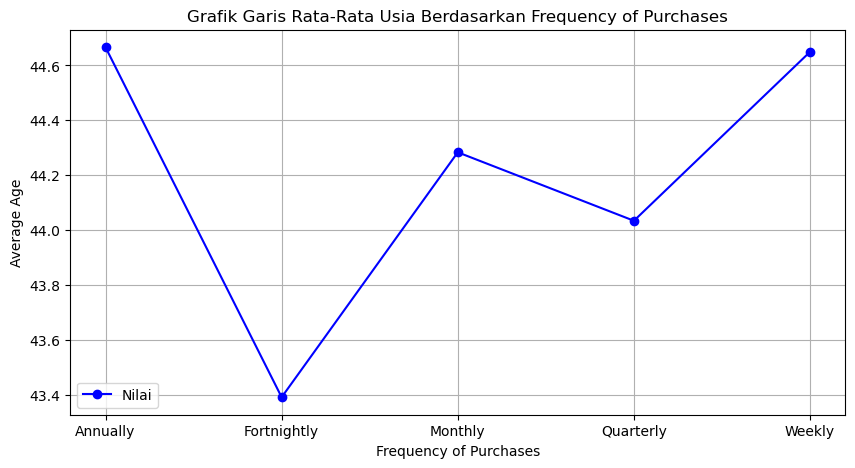

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(grouped_data['Frequency of Purchases'], grouped_data['Age'], marker='o', linestyle='-', color='b', label='Nilai')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Average Age')
plt.title('Grafik Garis Rata-Rata Usia Berdasarkan Frequency of Purchases')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16976\136495084.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Frequency of Purchases', y='Previous Purchases', marker='o', ci=None)


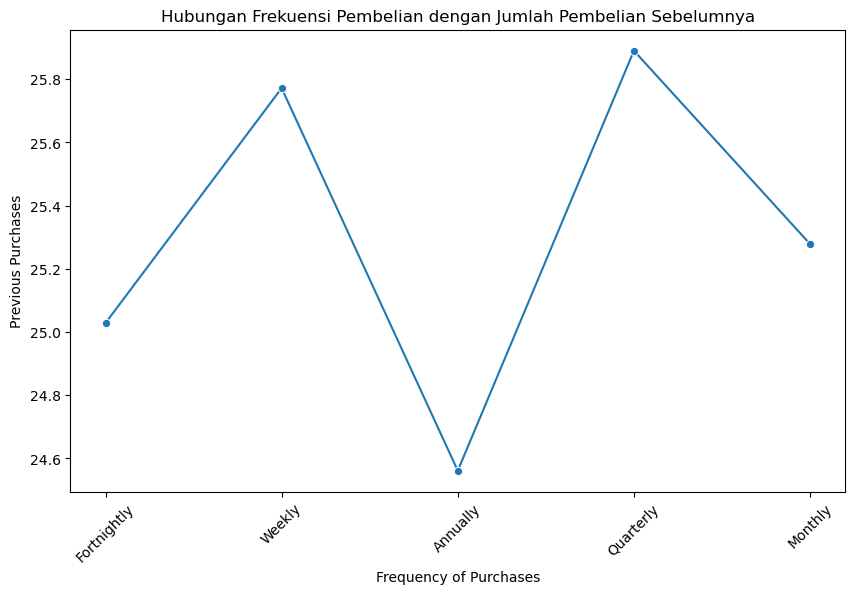

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Frequency of Purchases', y='Previous Purchases', marker='o', ci=None)
plt.xlabel('Frequency of Purchases')
plt.ylabel('Previous Purchases')
plt.title('Hubungan Frekuensi Pembelian dengan Jumlah Pembelian Sebelumnya')
plt.xticks(rotation=45)
plt.show()

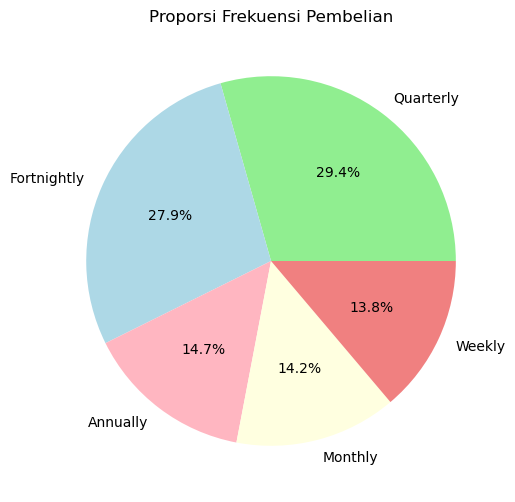

In [ ]:
plt.figure(figsize=(8, 6))
data['Frequency of Purchases'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightpink', 'lightyellow', 'lightcoral'])
plt.title('Proporsi Frekuensi Pembelian')
plt.ylabel('')
plt.show()

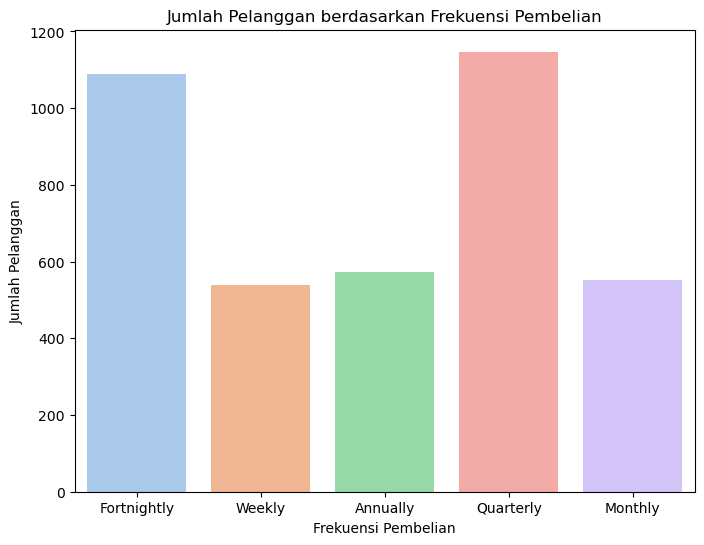

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Frequency of Purchases', palette='pastel')
plt.xlabel('Frekuensi Pembelian')
plt.ylabel('Jumlah Pelanggan')
plt.title('Jumlah Pelanggan berdasarkan Frekuensi Pembelian')
plt.show()

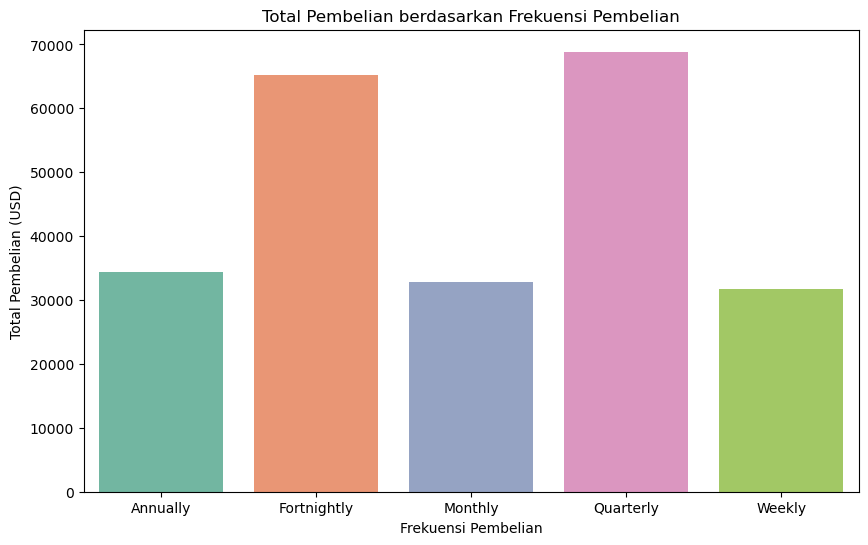

In [ ]:
plt.figure(figsize=(10, 6))
total_purchase = data.groupby('Frequency of Purchases')['Purchase Amount (USD)'].sum().reset_index()
sns.barplot(data=total_purchase, x='Frequency of Purchases', y='Purchase Amount (USD)', palette='Set2')
plt.xlabel('Frekuensi Pembelian')
plt.ylabel('Total Pembelian (USD)')
plt.title('Total Pembelian berdasarkan Frekuensi Pembelian')
plt.show()

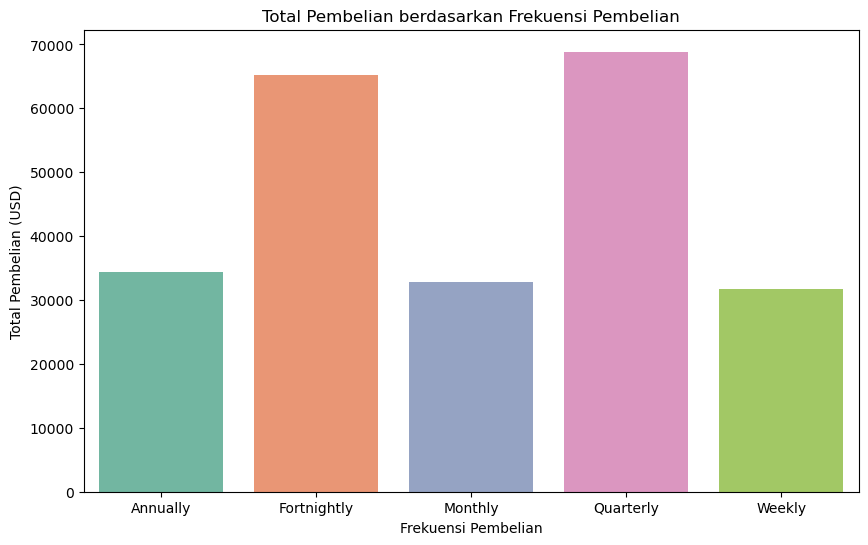

In [ ]:
plt.figure(figsize=(10, 6))
total_purchase = data.groupby('Frequency of Purchases')['Purchase Amount (USD)'].sum().reset_index()
sns.barplot(data=total_purchase, x='Frequency of Purchases', y='Purchase Amount (USD)', palette='Set2')
plt.xlabel('Frekuensi Pembelian')
plt.ylabel('Total Pembelian (USD)')
plt.title('Total Pembelian berdasarkan Frekuensi Pembelian')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16976\1980800469.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=data, x='Subscription Status', y='Age', palette='Set1')
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


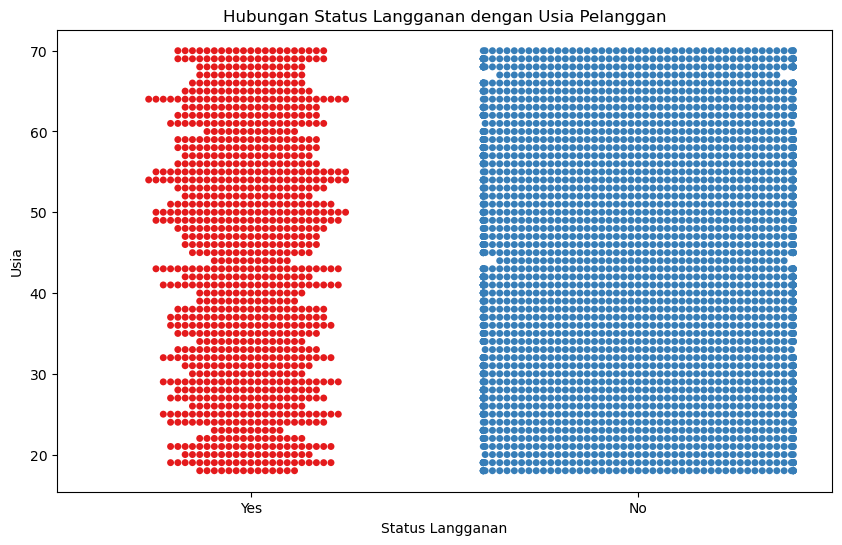

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=data, x='Subscription Status', y='Age', palette='Set1')
plt.xlabel('Status Langganan')
plt.ylabel('Usia')
plt.title('Hubungan Status Langganan dengan Usia Pelanggan')
plt.show()

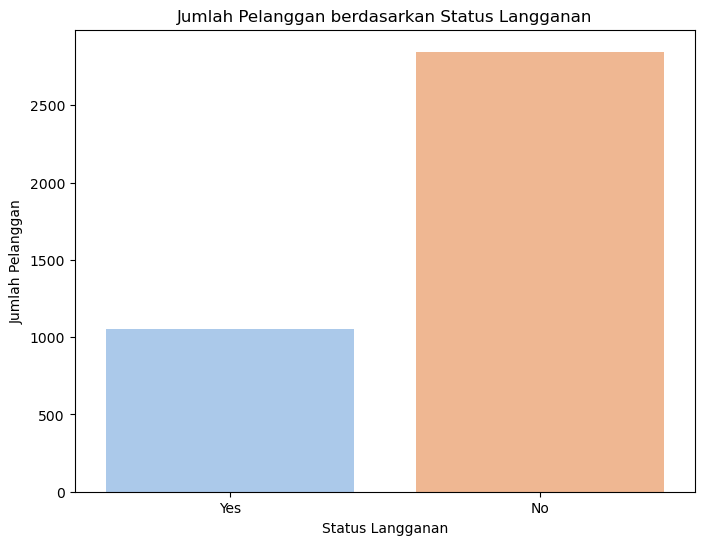

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Subscription Status', palette='pastel')
plt.xlabel('Status Langganan')
plt.ylabel('Jumlah Pelanggan')
plt.title('Jumlah Pelanggan berdasarkan Status Langganan')
plt.show()

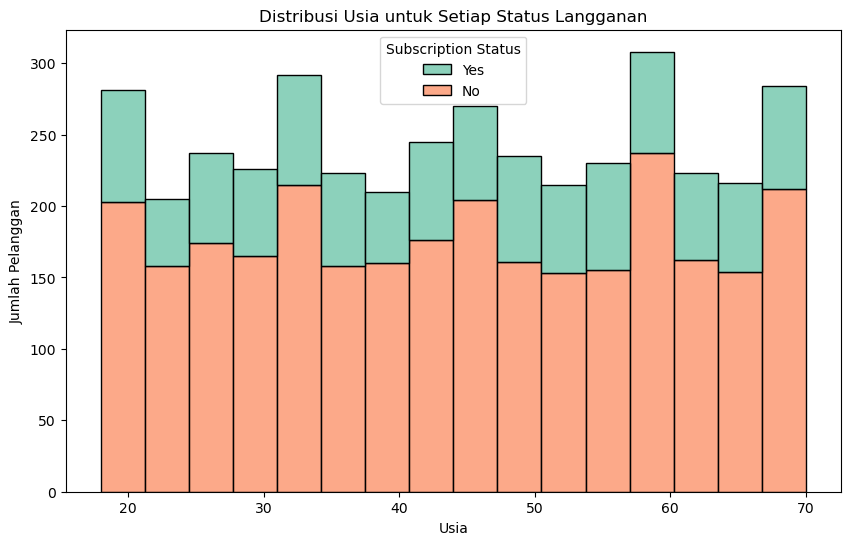

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Subscription Status', multiple='stack', palette='Set2')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pelanggan')
plt.title('Distribusi Usia untuk Setiap Status Langganan')
plt.show()

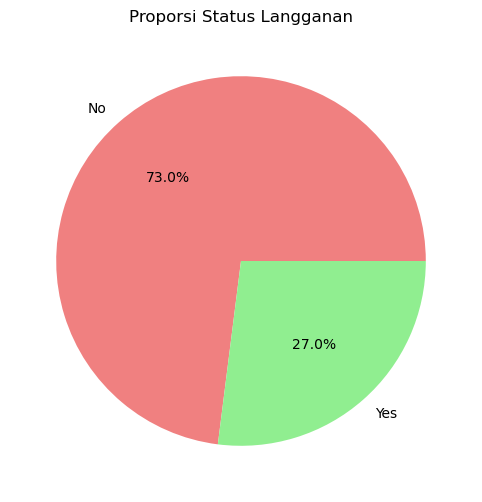

In [ ]:
plt.figure(figsize=(8, 6))
data['Subscription Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Proporsi Status Langganan')
plt.ylabel('')
plt.show()

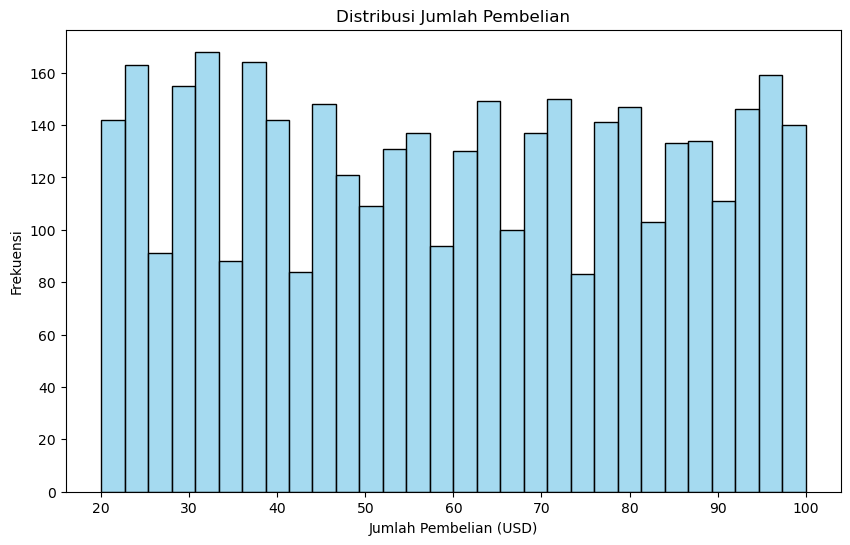

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Purchase Amount (USD)', bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Jumlah Pembelian (USD)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Jumlah Pembelian')
plt.show()

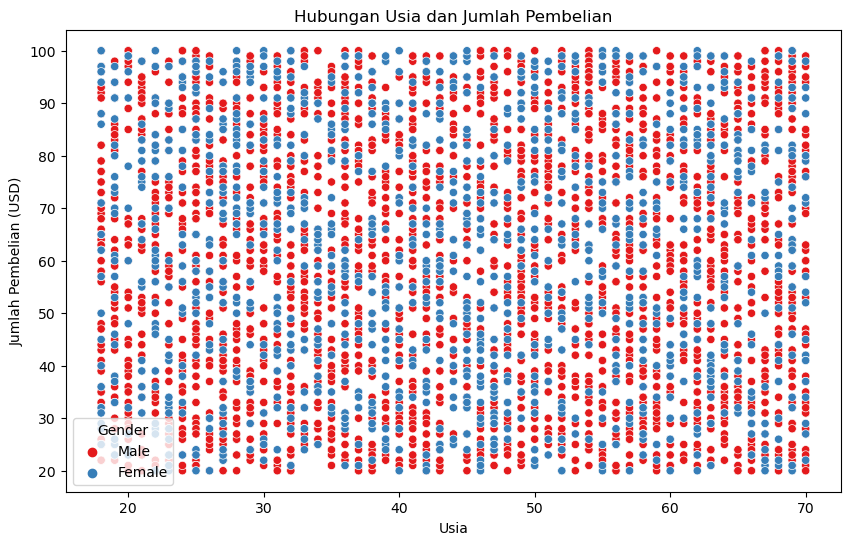

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Purchase Amount (USD)', hue='Gender', palette='Set1')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pembelian (USD)')
plt.title('Hubungan Usia dan Jumlah Pembelian')
plt.show()

In [ ]:
data2 = data.copy()

In [ ]:
data2

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.10,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.10,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.10,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.50,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.70,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.20,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.50,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Fortnightly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.90,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.80,No,PayPal,Express,No,No,24,Venmo,Weekly


In [ ]:
data2['Frequency of Purchases'].value_counts()

Frequency of Purchases
Quarterly      1147
Fortnightly    1089
Annually        572
Monthly         553
Weekly          539
Name: count, dtype: int64

In [ ]:
# Menghitung jumlah masing-masing nilai dan mengurutkan berdasarkan nilai kemunculan
size_counts = data2['Size'].value_counts(sort=False)

print(size_counts)

Size
L     1053
S      663
M     1755
XL     429
Name: count, dtype: int64


In [ ]:
#melakukan konversi tipe data pada kolom frequency of purchases dari kategori ke numerik
sz = {'S':0,'M':1,'L':2,'XL':3}

#Melakukan konversi tipe data pada kolom 'Frequency of Purchases' dari kategori ke numerik
data2['Size'] = data2['Size'].replace(sz)

# Menghitung jumlah masing-masing nilai dalam kolom 'Frequency of Purchases'
size_counts = data2['Size'].value_counts()

print(size_counts)

Size
1    1755
2    1053
0     663
3     429
Name: count, dtype: int64


In [ ]:
encoder = LabelEncoder()
data2.columns
for col in data2.columns:
        data2[col] = encoder.fit_transform(data2[col]).astype(int)
data2

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,0,37,1,2,1,33,16,2,7,3,6,1,2,1,1,1,13,5,1
1,1,1,1,23,1,44,18,2,12,3,6,1,0,1,1,1,1,1,1
2,2,32,1,11,1,53,20,0,12,1,6,1,1,2,1,1,22,2,4
3,3,3,1,14,2,70,38,1,12,1,10,1,4,3,1,1,48,4,4
4,4,27,1,2,1,29,36,1,21,1,2,1,1,2,1,1,30,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3895,22,0,9,1,8,45,2,21,2,17,0,1,0,0,0,31,5,4
3896,3896,34,0,0,0,29,14,2,23,1,20,0,4,5,0,0,40,0,1
3897,3897,28,0,1,0,13,29,2,8,1,4,0,2,4,0,0,23,5,3
3898,3898,26,0,17,2,57,22,0,3,2,13,0,4,1,0,0,23,5,4


In [ ]:
data2 = data2.drop(columns=['Customer ID', 'Review Rating','Discount Applied', 'Promo Code Used'])
data2

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,37,1,2,1,33,16,2,7,3,1,2,1,13,5,1
1,1,1,23,1,44,18,2,12,3,1,0,1,1,1,1
2,32,1,11,1,53,20,0,12,1,1,1,2,22,2,4
3,3,1,14,2,70,38,1,12,1,1,4,3,48,4,4
4,27,1,2,1,29,36,1,21,1,1,1,2,30,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,22,0,9,1,8,45,2,21,2,0,1,0,31,5,4
3896,34,0,0,0,29,14,2,23,1,0,4,5,40,0,1
3897,28,0,1,0,13,29,2,8,1,0,2,4,23,5,3
3898,26,0,17,2,57,22,0,3,2,0,4,1,23,5,4


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       3900 non-null   int32
 1   Gender                    3900 non-null   int32
 2   Item Purchased            3900 non-null   int32
 3   Category                  3900 non-null   int32
 4   Purchase Amount (USD)     3900 non-null   int32
 5   Location                  3900 non-null   int32
 6   Size                      3900 non-null   int32
 7   Color                     3900 non-null   int32
 8   Season                    3900 non-null   int32
 9   Subscription Status       3900 non-null   int32
 10  Payment Method            3900 non-null   int32
 11  Shipping Type             3900 non-null   int32
 12  Previous Purchases        3900 non-null   int32
 13  Preferred Payment Method  3900 non-null   int32
 14  Frequency of Purchases    3900 non-null 

In [ ]:
#mengecek nilai unik setiap kolom
data2.nunique().sort_values()

Gender                       2
Subscription Status          2
Category                     4
Size                         4
Season                       4
Frequency of Purchases       5
Payment Method               6
Shipping Type                6
Preferred Payment Method     6
Item Purchased              25
Color                       25
Location                    50
Previous Purchases          50
Age                         53
Purchase Amount (USD)       81
dtype: int64

In [ ]:
data2.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Subscription Status',
       'Payment Method', 'Shipping Type', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
LE = LabelEncoder()
data2["Frequency of Purchases"] = LE.fit_transform(data2["Frequency of Purchases"])
CL = data2[['Frequency of Purchases', 'Age',"Purchase Amount (USD)"]]


In [ ]:
CL.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency of Purchases,3900.0,1.997949,1.308914,0.0,1.0,2.0,3.0,4.0
Age,3900.0,26.068462,15.207589,0.0,13.0,26.0,39.0,52.0
Purchase Amount (USD),3900.0,39.764359,23.685392,0.0,19.0,40.0,61.0,80.0


In [ ]:
CL.corr()

,Frequency of Purchases,Age,Purchase Amount (USD)
Frequency of Purchases,1.000000,0.008240,-0.009397
Age,0.008240,1.000000,-0.010424
Purchase Amount (USD),-0.009397,-0.010424,1.000000


In [ ]:
kmeans = KMeans(n_clusters=3,init="k-means++" )
kmeans.fit(CL)
y_kmeans = kmeans.predict(CL)
y_kmeans

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 0, 2, ..., 1, 2, 2])

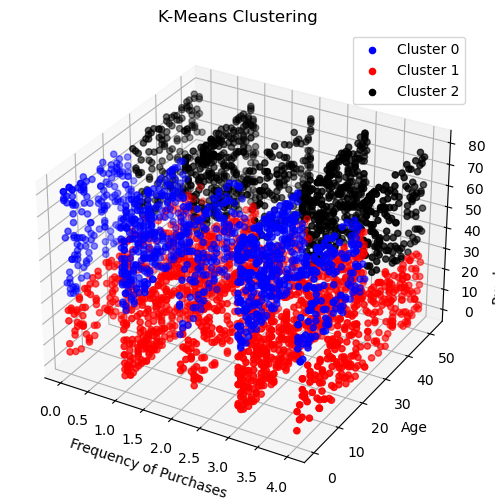

In [ ]:
def plot_3d_clusters(y_pred,cluster_type) :
      fig = plt.figure(figsize=(8, 6))
      ax = fig.add_subplot(111, projection='3d')

      colors = ['blue', 'red', 'black']
      for cluster_label in range(3):
            ax.scatter(CL[y_pred == cluster_label]['Frequency of Purchases'],
                              CL[y_pred == cluster_label]['Age'],
                              CL[y_pred == cluster_label]["Purchase Amount (USD)"],
                              label=f'Cluster {cluster_label}', c=colors[cluster_label])


      ax.set_xlabel('Frequency of Purchases')
      ax.set_ylabel('Age')
      ax.set_zlabel('Purchase Amount (USD)',)
      ax.set_title(f'{cluster_type} Clustering ')
      ax.legend()
      plt.show()
plot_3d_clusters(kmeans.labels_,"K-Means")

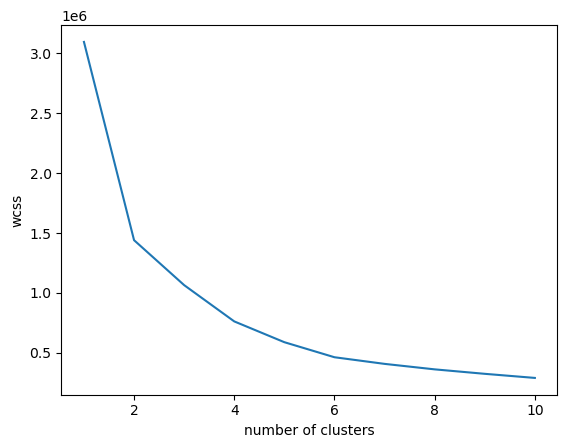

In [ ]:
wcss = []
for i in range(1,11):       #range value
  kmeans = KMeans( n_clusters=i , init="k-means++" , random_state = 42,n_init=10)
  kmeans.fit(CL)
  wcss.append(kmeans.inertia_)

#plotting graph
plt.plot(range(1,11),wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


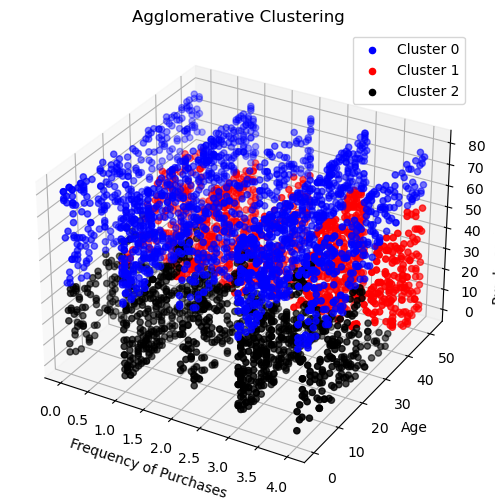

In [ ]:
ac = AgglomerativeClustering(n_clusters=3, affinity="euclidean",linkage="ward")
y_pred = ac.fit_predict(CL)
y_pred
plot_3d_clusters(y_pred,"Agglomerative")

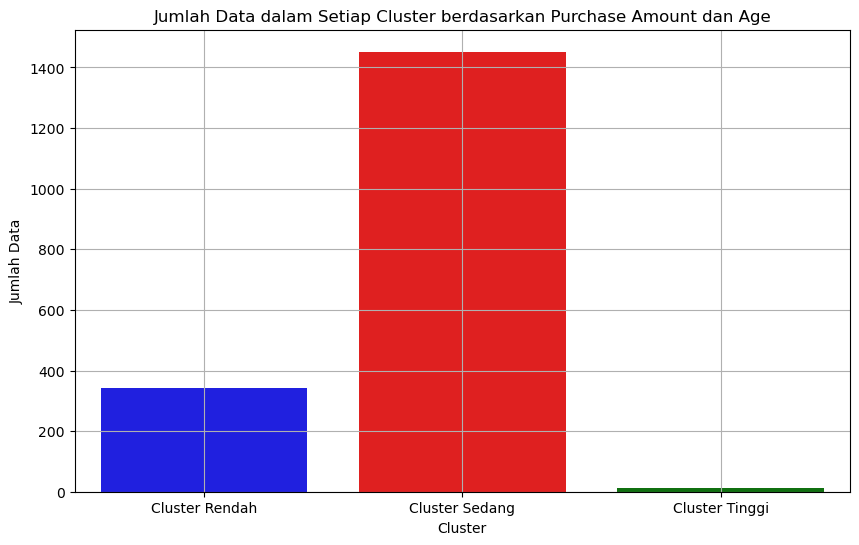

In [ ]:
kelas_biru = data[(data['Purchase Amount (USD)'] >= 70) & (data['Age'] < 30)]
kelas_merah = data[(data['Purchase Amount (USD)'] >= 30) & (data['Purchase Amount (USD)'] < 70) & (data['Age'] >= 30) & (data['Age'] < 70)]
kelas_hijau = data[(data['Purchase Amount (USD)'] < 30) & (data['Age'] >= 70)]

count_kelas_biru = len(kelas_biru)
count_kelas_merah = len(kelas_merah)
count_kelas_hijau = len(kelas_hijau)

plt.figure(figsize=(10, 6))
sns.barplot(x=['Cluster Rendah', 'Cluster Sedang', 'Cluster Tinggi'], y=[count_kelas_biru, count_kelas_merah, count_kelas_hijau], palette=['blue', 'red', 'green'])

plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')

plt.title('Jumlah Data dalam Setiap Cluster berdasarkan Purchase Amount dan Age')

plt.grid(True)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16976\3536154466.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['Frequency of Purchases'],kde=True)


Text(0.5, 1.0, 'Distribution of Frequency of Purchases')

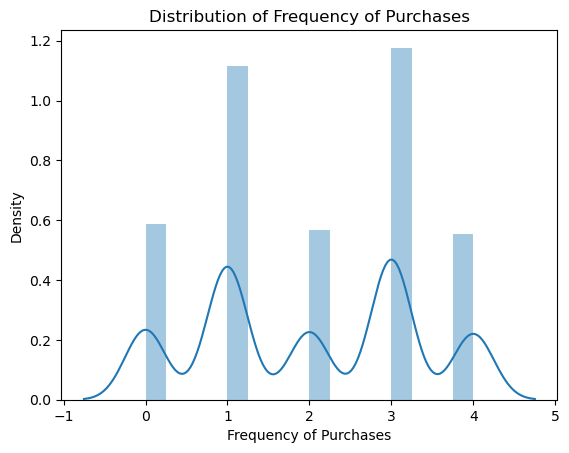

In [ ]:
sns.distplot(data2['Frequency of Purchases'],kde=True)
plt.title('Distribution of Frequency of Purchases')

<Figure size 1000x800 with 0 Axes>

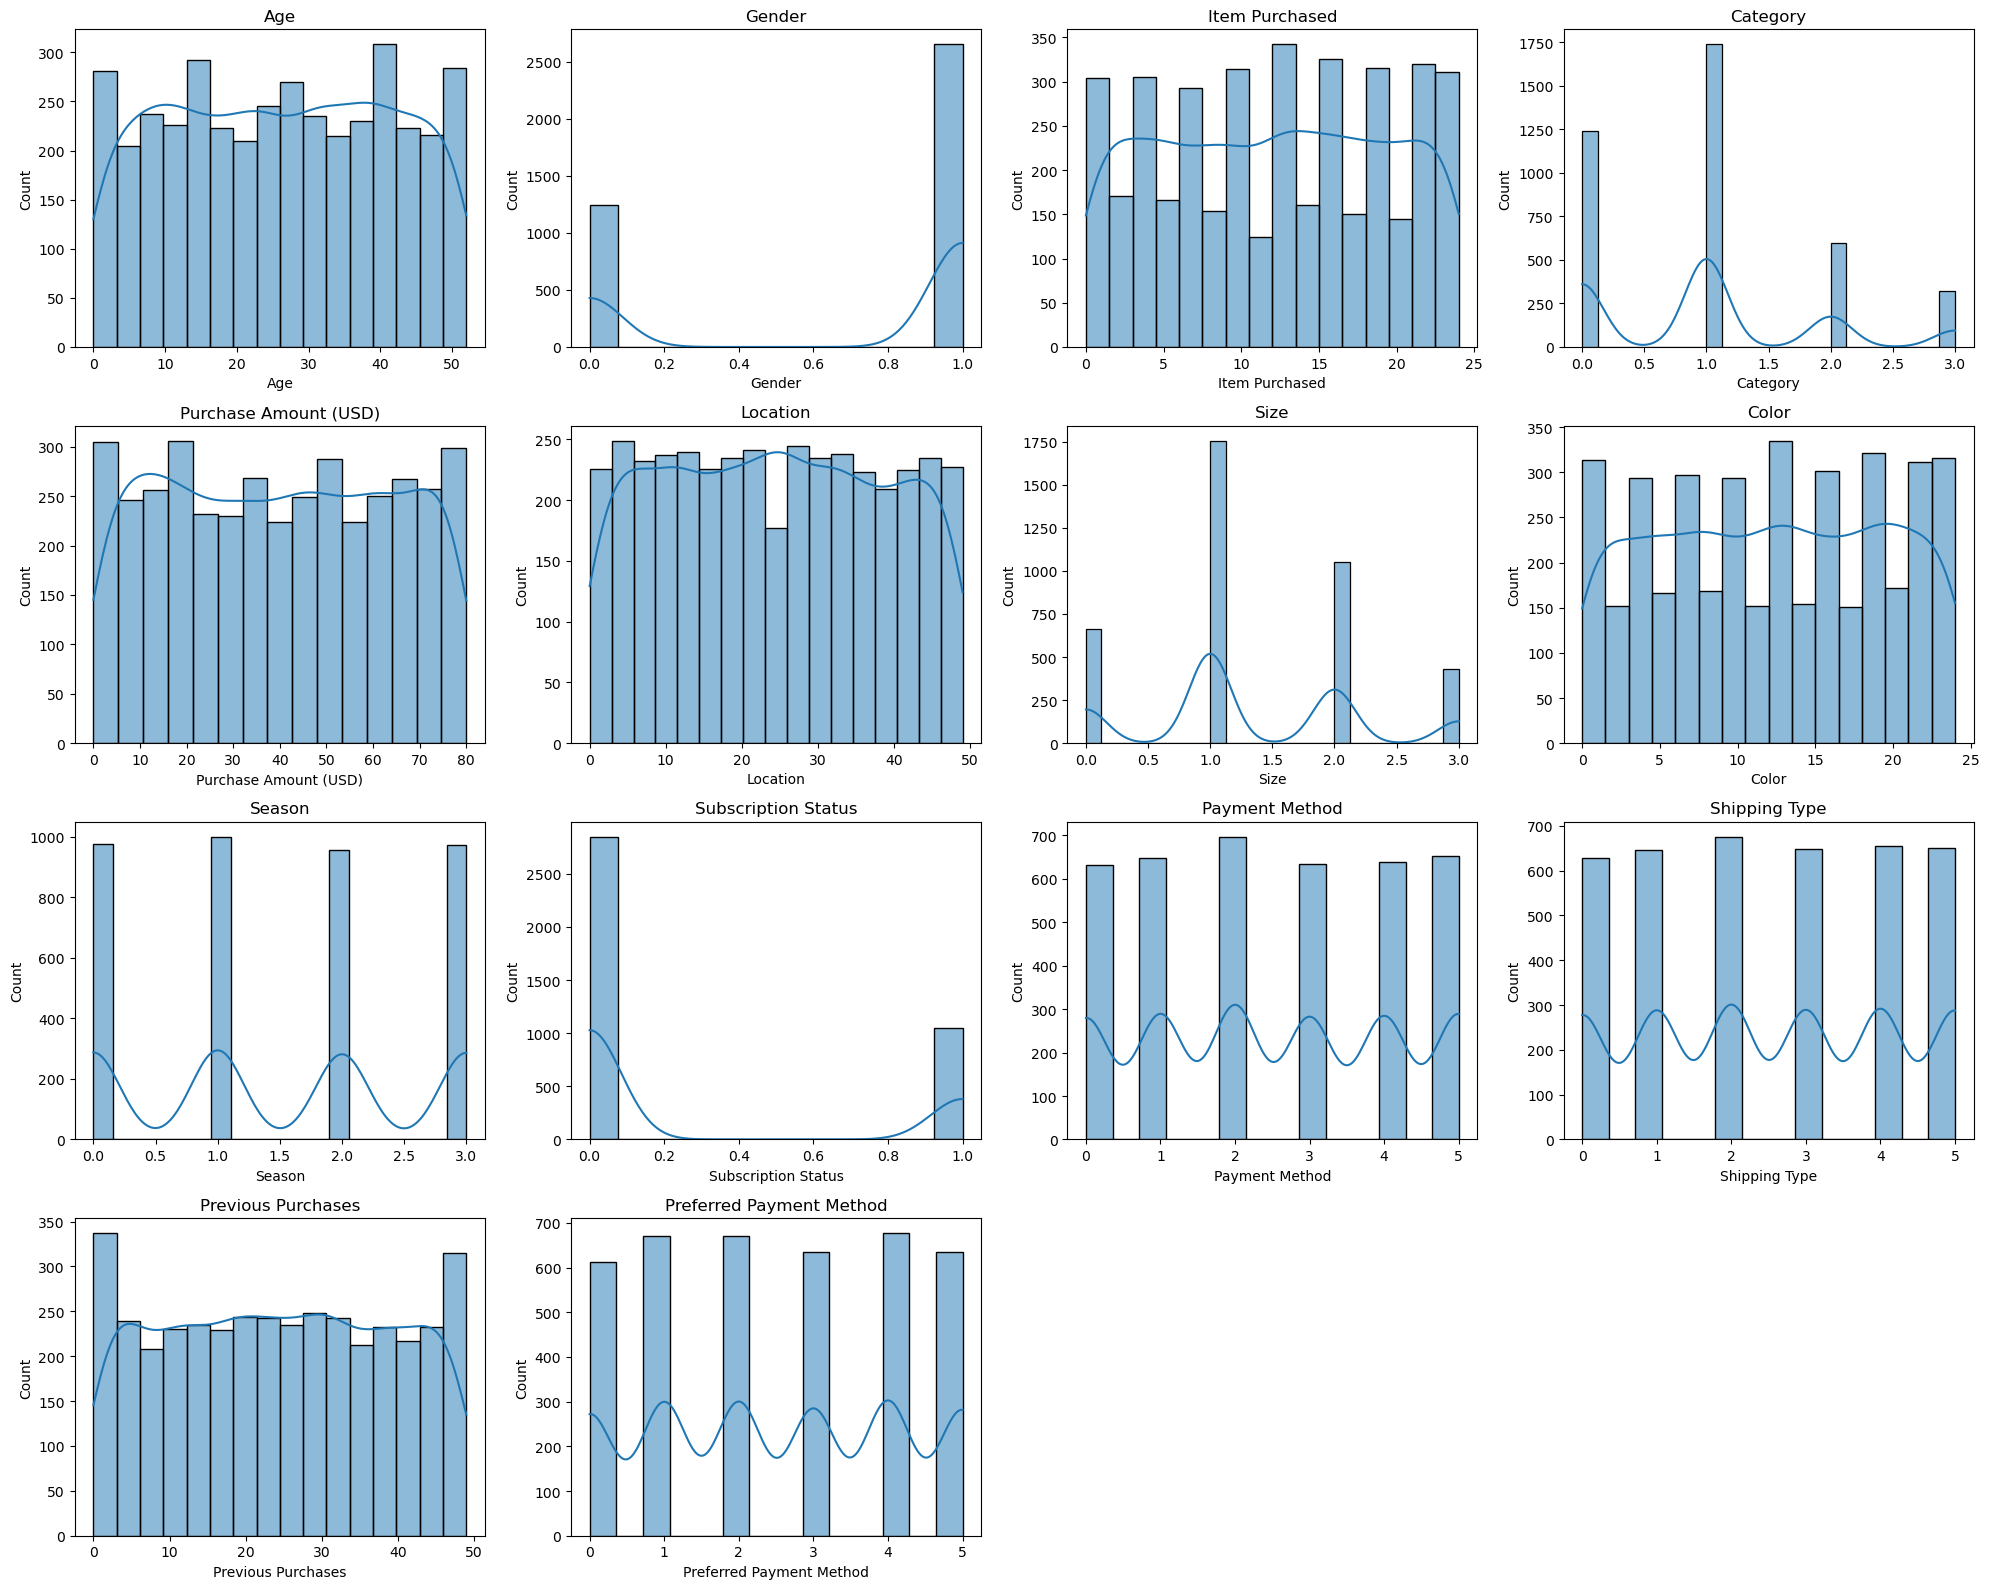

In [ ]:
columns=['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Subscription Status',
       'Payment Method', 'Shipping Type', 'Previous Purchases',
       'Preferred Payment Method']
plt.figure(figsize=(10,8))

# Menentukan ukuran grid untuk subplot
num_columns = 4
num_rows = (len(columns) + num_columns - 1) // num_columns  # Pembulatan ke atas untuk memastikan cukup ruang

plt.figure(figsize=(20, num_rows * 4))

for i, column in enumerate(columns):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.histplot(data2[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

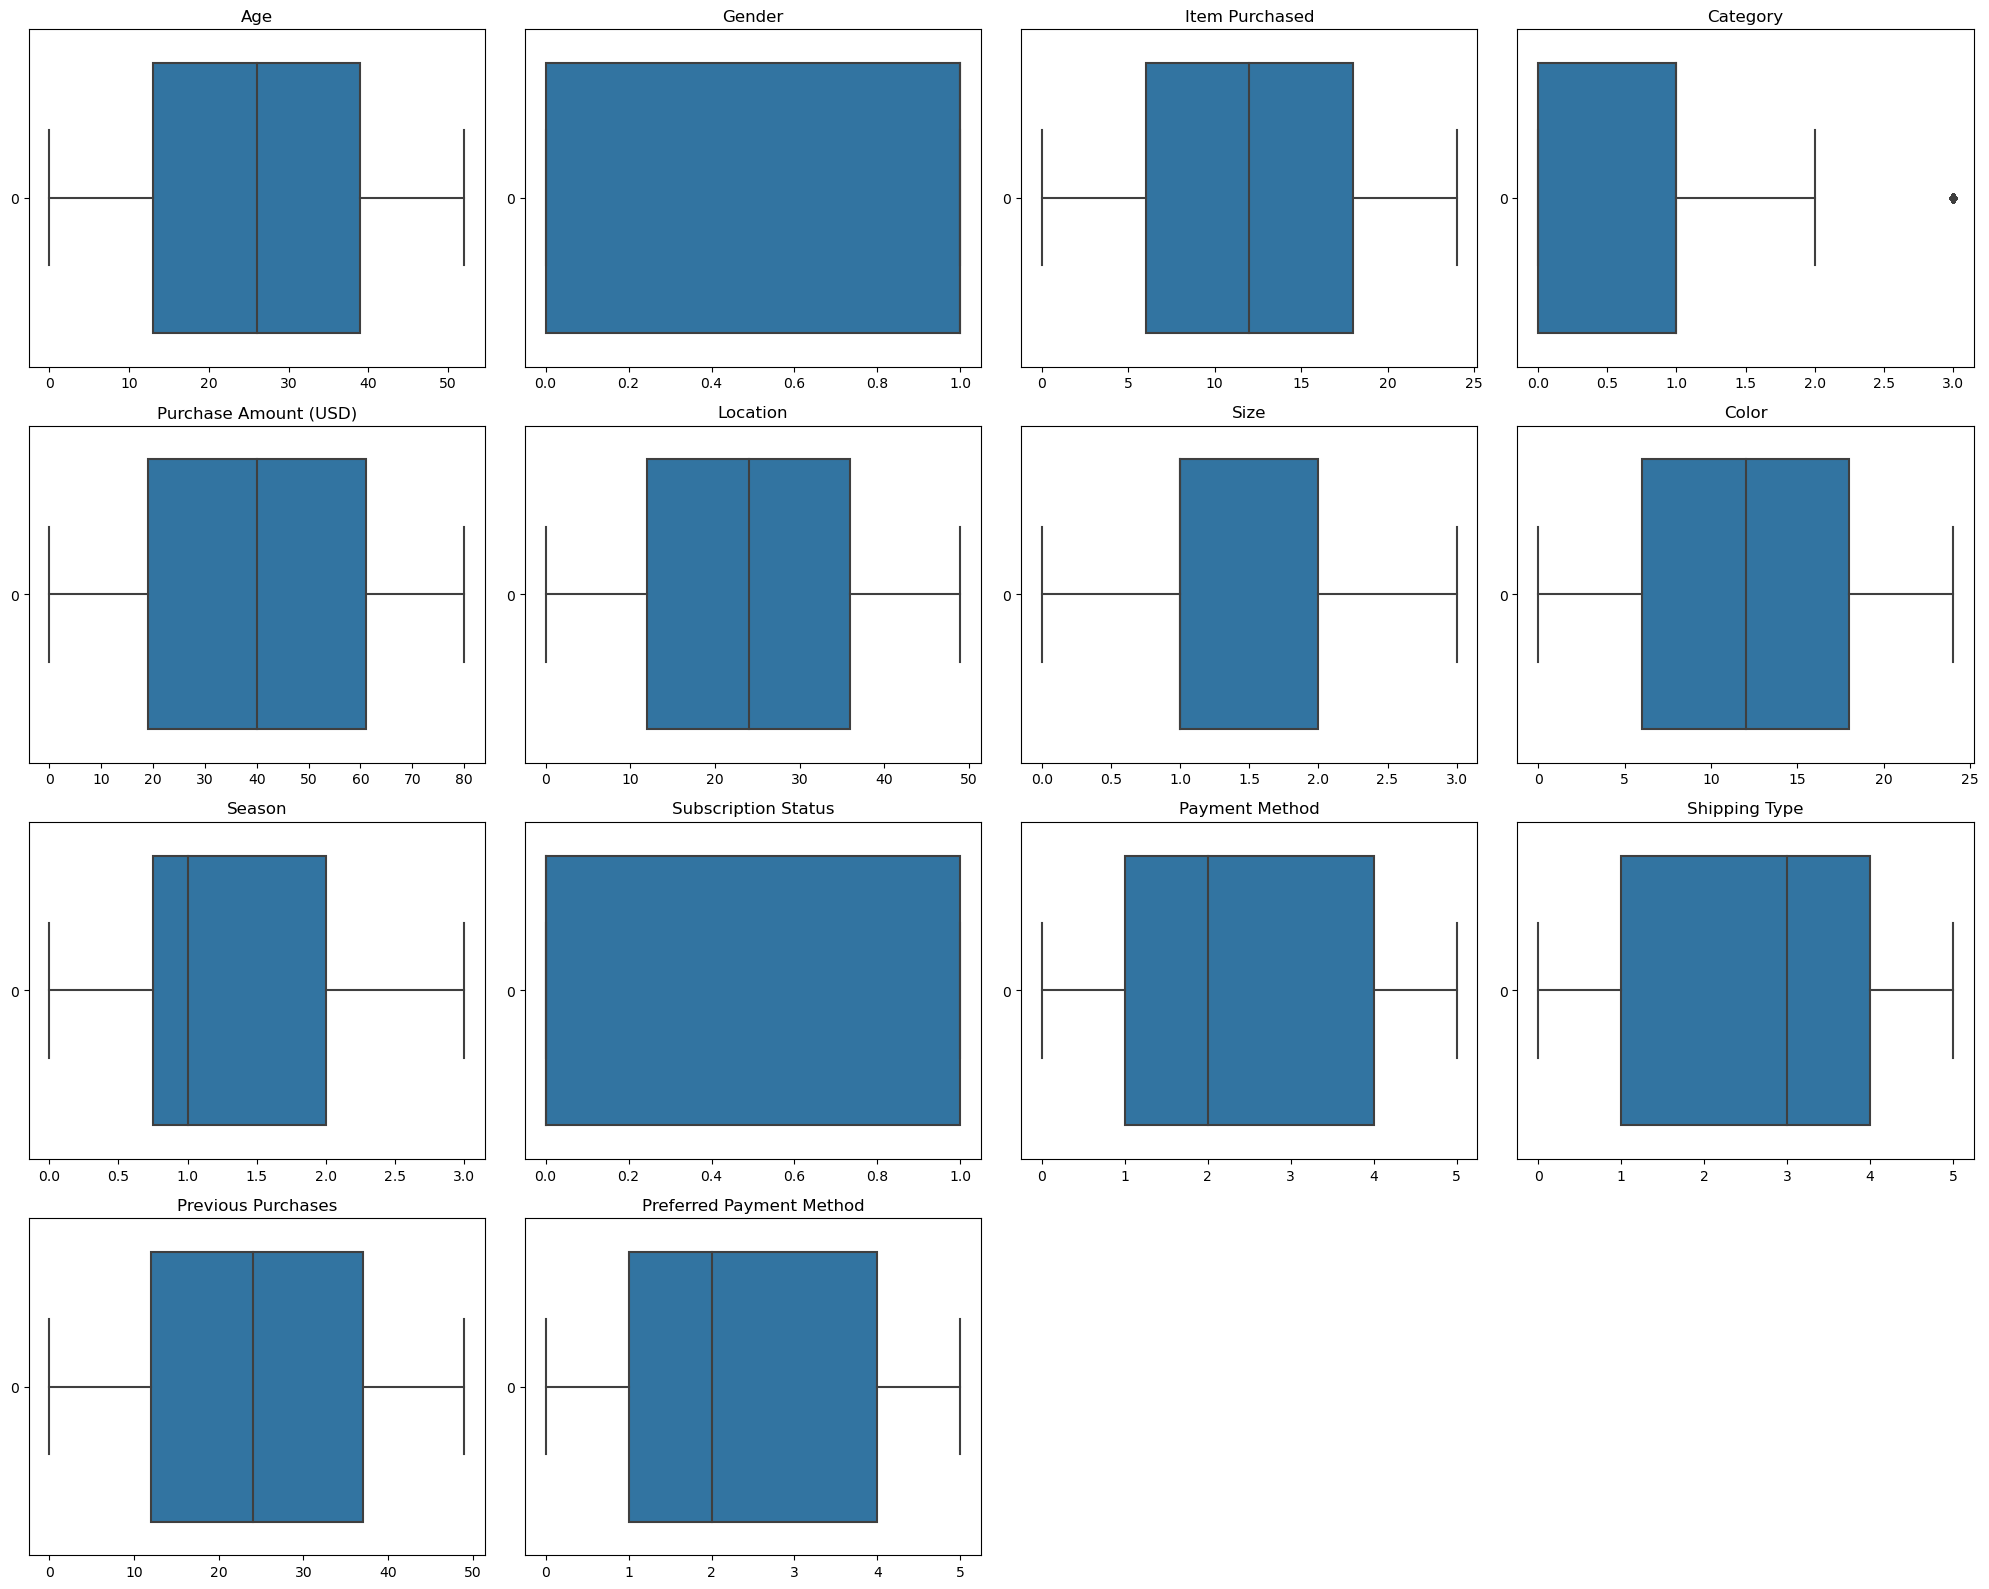

In [ ]:
columns=['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Subscription Status',
       'Payment Method', 'Shipping Type', 'Previous Purchases',
       'Preferred Payment Method']
plt.figure(figsize=(10,8))

# Menentukan ukuran grid untuk subplot
num_columns = 4
num_rows = (len(columns) + num_columns - 1) // num_columns  # Pembulatan ke atas untuk memastikan cukup ruang

plt.figure(figsize=(20, num_rows * 4))

for i, column in enumerate(columns):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.boxplot(data2[column], orient='h')
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
#mendeteksi outliers
# Menghitung z-score
z_scores = np.abs((data2 - data2.mean()) / data2.std())

# Menampilkan outlier
outliers = data2[(z_scores > 3).any(axis=1)]
print("Outliers berdasarkan z-score:")
print(outliers)

Outliers berdasarkan z-score:
Empty DataFrame
Columns: [Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Subscription Status, Payment Method, Shipping Type, Previous Purchases, Preferred Payment Method, Frequency of Purchases]
Index: []


In [ ]:
# Memilih fitur numerik untuk distandarisasi
numerical_features = ['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Subscription Status',
       'Payment Method', 'Shipping Type',
       'Preferred Payment Method']

# Membuat objek StandardScaler
scaler = StandardScaler()

# Standarisasi fitur numerik
data2[numerical_features] = scaler.fit_transform(data2[numerical_features])

print(data2)

           Age    Gender  Item Purchased  Category  Purchase Amount (USD)  \
0     0.718913  0.685994       -1.394144 -0.002002              -0.285629   
1    -1.648629  0.685994        1.523236 -0.002002               0.178852   
2     0.390088  0.685994       -0.143839 -0.002002               0.558882   
3    -1.517099  0.685994        0.272930  1.113356               1.276716   
4     0.061263  0.685994       -1.394144 -0.002002              -0.454531   
...        ...       ...             ...       ...                    ...   
3895 -0.267563 -1.457738       -0.421684 -0.002002              -1.341267   
3896  0.521618 -1.457738       -1.671990 -1.117360              -0.454531   
3897  0.127028 -1.457738       -1.533067 -1.117360              -1.130139   
3898 -0.004502 -1.457738        0.689699  1.113356               0.727784   
3899  0.521618 -1.457738       -0.699530 -1.117360               0.896686   

      Location      Size     Color    Season  Subscription Status  \
0    -

In [ ]:
data2.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Subscription Status',
       'Payment Method', 'Shipping Type', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

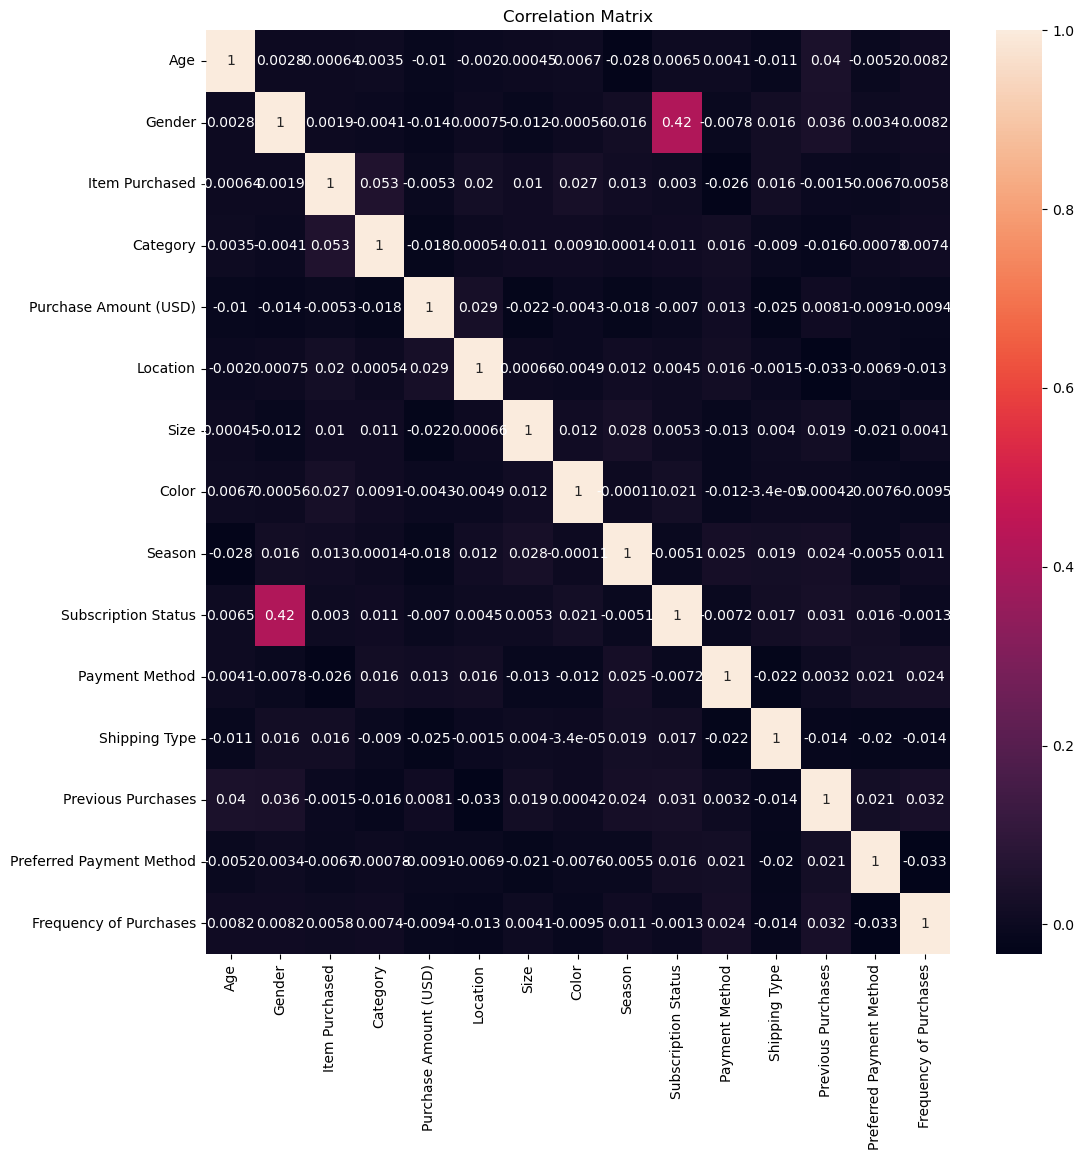

In [ ]:
#melihat hubungan antar kolom
plt.figure(figsize=(12,12))
sns.heatmap(data2.corr(),annot=True)
plt.title('Correlation Matrix')

In [ ]:
# Tentukan interval bins dan label
bins = [0, 50, 80, 100]
labels = ['30-50', '51-80', '81-100']

# Menggunakan pd.cut untuk membagi data ke dalam kelas
data2['PA Group'] = pd.cut(data2['Purchase Amount (USD)'], bins=bins, labels=labels, right=False)

# Konversi kelas menjadi angka dengan LabelEncoder
encoder = LabelEncoder()
data2['PA Group'] = encoder.fit_transform(data2['PA Group'])

In [ ]:
#membagi data menjadi fitur (X) dan target (Y)
X = data2.drop(['Purchase Amount (USD)','PA Group'],axis=1)
Y = data2['PA Group']

In [ ]:
#membagi data menjadi data train dan data test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
onehot_encoder = OneHotEncoder()
Y_encoded = onehot_encoder.fit_transform(Y.values.reshape(-1,1)).toarray()


In [ ]:
# Konversi Y_train ke dalam bentuk array
Y_train_array = np.array(Y_train)

# Konversi Y_test ke dalam bentuk array
Y_test_array = np.array(Y_test)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#mengecek proporsi X train, X test, Y train dan Y test
print('Jumlah baris dan kolom dari x_train adalah:',X_train_scaled.shape,', sedangkan jumlah baris dan kolom dari y_train adalah:',Y_train.shape)
print('Jumlah baris dan kolom dari x_test adalah:',X_test_scaled.shape,', sedangkan jumlah baris dan kolom dari y_test adalah:',Y_test.shape)


Jumlah baris dan kolom dari x_train adalah: (3120, 14) , sedangkan jumlah baris dan kolom dari y_train adalah: (3120,)
Jumlah baris dan kolom dari x_test adalah: (780, 14) , sedangkan jumlah baris dan kolom dari y_test adalah: (780,)


In [ ]:
def pred_model(model,X_train_scaled,Y_train,X_test_scaled,Y_test):
  c=model()
  c.fit(X_train_scaled,Y_train)
  y_train_pred = c.predict(X_train_scaled)
  y_test_pred = c.predict(X_test_scaled)
  print(model)
  print('Coefficient: ',c.coef_)
  print('Intercept: ',c.intercept_)
  print(f'MSE Testing:{mean_squared_error(Y_test,y_test_pred)}')
  print(f'MSE Training:{mean_squared_error(Y_train,y_train_pred)}\n')
  print(f'MAE Testing:{mean_absolute_error(Y_test,y_test_pred)}')
  print(f'MAE Training:{mean_absolute_error(Y_train,y_train_pred)}\n')
  print(f'R2 Testing:{r2_score(Y_test,y_test_pred)}')
  print(f'R2 Training:{r2_score(Y_train,y_train_pred)}\n')
  print(f'RMSE Testing:{np.sqrt(mean_squared_error(Y_test,y_test_pred))}')
  print(f'RMSE Training:{np.sqrt(mean_squared_error(Y_train,y_train_pred))}')

  #ploting y train dgn y train pred
  plt.figure(figsize=[15,4])
  plt.subplot(1,2,2)
  plt.scatter(Y_train,y_train_pred)
  plt.plot([Y_train.min(),Y_train.max()],[Y_train.min(),Y_train.max()],'r--')
  plt.title('Comparison of Y train (Actual value) with y train pred (Prediction result)')
  plt.xlabel('Y_train')
  plt.ylabel('y_train_pred')
  plt.show()

  #ploting y test dengan y test pred
  plt.figure(figsize=[15,4])
  plt.subplot(1,2,2)
  plt.scatter(Y_test,y_test_pred)
  plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()],'r--')
  plt.title('Comparison of Y test (Actual value) with y test pred (Prediction result)')
  plt.xlabel('Y_test')
  plt.ylabel('y_test_pred')
  plt.show()

<class 'sklearn.linear_model._base.LinearRegression'>
Coefficient:  [ 0.00654354  0.00342444 -0.00794197  0.00345095 -0.01621437  0.00477491
 -0.00136782  0.00144745 -0.00685942 -0.01117339  0.0023811  -0.00038088
  0.00991134  0.00711008]
Intercept:  0.48529821655910244
MSE Testing:0.2520054208846168
MSE Training:0.2491443334498762

MAE Testing:0.5011156579112225
MAE Training:0.4982886668997524

R2 Testing:-0.010173532483402026
R2 Training:0.003028974075284241

RMSE Testing:0.502001415221727
RMSE Training:0.4991436000289658


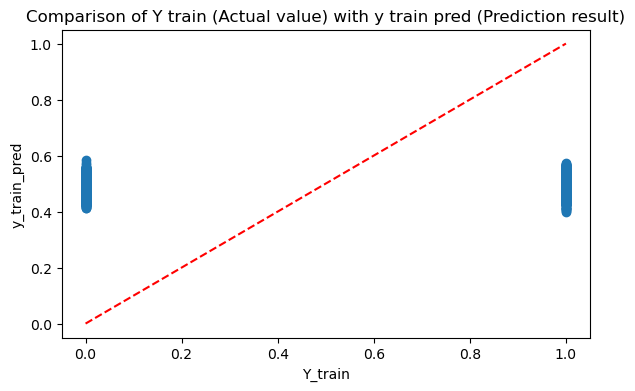

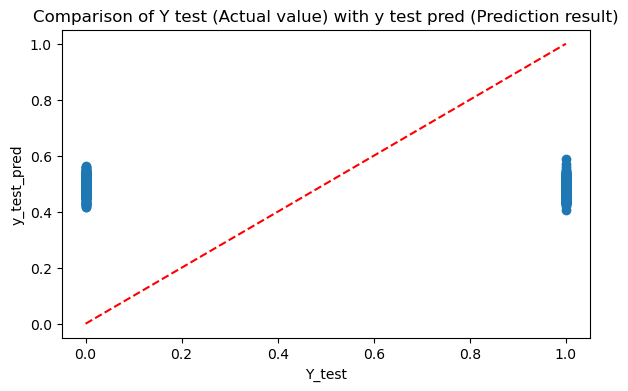

In [ ]:
pred_model(LinearRegression,X_train,Y_train,X_test,Y_test)

<class 'sklearn.linear_model._coordinate_descent.Lasso'>
Coefficient:  [ 0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.  0.  0.]
Intercept:  0.49006410256410254
MSE Testing:0.2505573019395135
MSE Training:0.24990127794214334

MAE Testing:0.5004585798816569
MAE Training:0.4998025558842866

R2 Testing:-0.004368691360952859
R2 Training:0.0

RMSE Testing:0.5005569916997599
RMSE Training:0.49990126819417385


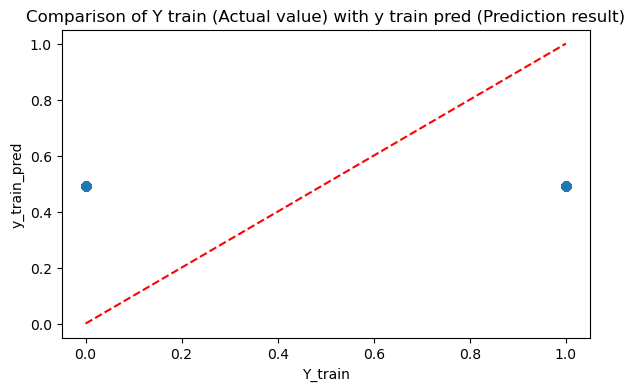

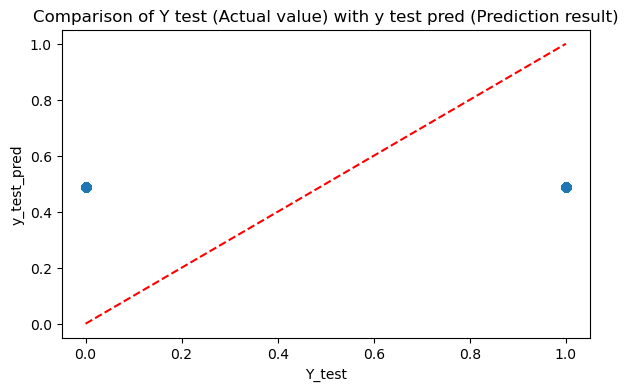

In [ ]:
pred_model(Lasso,X_train_scaled,Y_train,X_test_scaled,Y_test)

<class 'sklearn.linear_model._ridge.Ridge'>
Coefficient:  [ 0.00654238  0.00344114 -0.00790741  0.00345238 -0.01606718  0.00476693
 -0.00136625  0.00144675 -0.00682661 -0.01122873  0.00238485 -0.00552771
  0.00993464  0.00928448]
Intercept:  0.49006410256410254
MSE Testing:0.25200464006816087
MSE Training:0.24914433354035376

MAE Testing:0.5011154226389031
MAE Training:0.49828918487327495

R2 Testing:-0.010170402550265356
R2 Training:0.0030289737132309646

RMSE Testing:0.5020006375176838
RMSE Training:0.49914360011959863


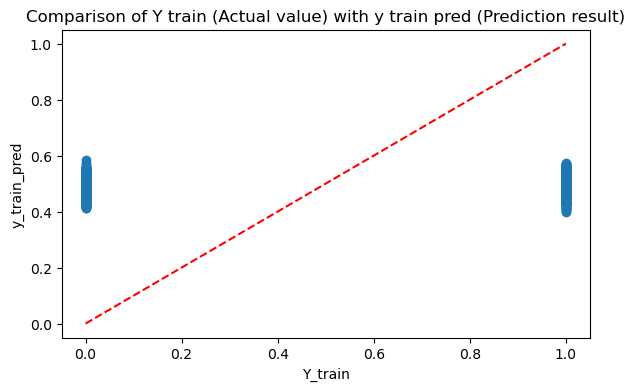

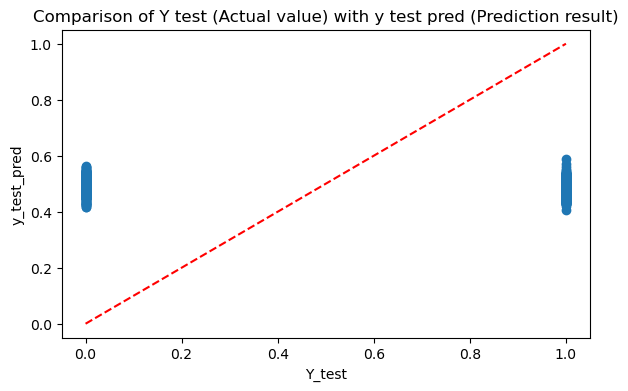

In [ ]:
pred_model(Ridge,X_train_scaled,Y_train,X_test_scaled,Y_test)

<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
Coefficient:  [ 0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.  0.  0.]
Intercept:  0.49006410256410254
MSE Testing:0.2505573019395135
MSE Training:0.24990127794214334

MAE Testing:0.5004585798816569
MAE Training:0.4998025558842866

R2 Testing:-0.004368691360952859
R2 Training:0.0

RMSE Testing:0.5005569916997599
RMSE Training:0.49990126819417385


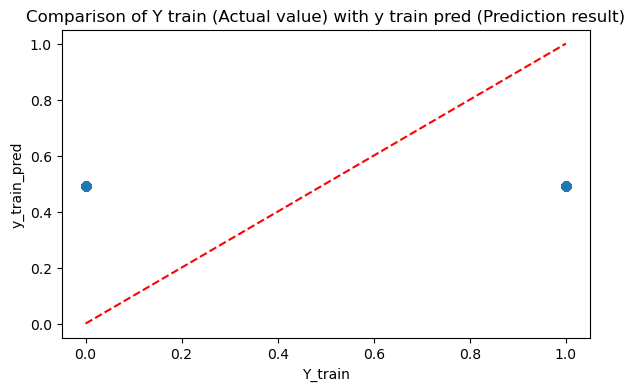

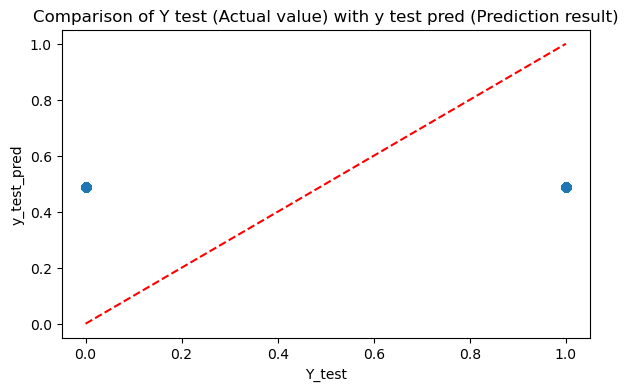

In [ ]:
pred_model(ElasticNet,X_train_scaled,Y_train,X_test_scaled,Y_test)

In [ ]:
# Membagi data
X_train_svr, X_test_svr, Y_train_svr, Y_test_svr = train_test_split(X, Y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_svr, Y_train_svr)
cross_val_scores = cross_val_score(rf_model, X, Y, cv=5, scoring='neg_mean_squared_error')
cross_val_rmse_scores = np.sqrt(-cross_val_scores)

# Evaluasi model
y_train_pred = rf_model.predict(X_train_svr)
y_test_pred = rf_model.predict(X_test_svr)

# MetriK evaluasi
mse_train = mean_squared_error(Y_train_svr, y_train_pred)
mse_test = mean_squared_error(Y_test_svr, y_test_pred)
mae_train = mean_absolute_error(Y_train_svr, y_train_pred)
mae_test = mean_absolute_error(Y_test_svr, y_test_pred)
r2_train = r2_score(Y_train_svr, y_train_pred)
r2_test = r2_score(Y_test_svr, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f'MSE Training:{mse_train}')
print(f'MSE Testing:{mse_test}')
print(f'MAE Training:{mae_train}')
print(f'MAE Testing:{mae_test}')
print(f'R2 Training:{r2_train}')
print(f'R2 Testing:{r2_test}')
print(f'RMSE Training:{rmse_train}')
print(f'RMSE Testing:{rmse_test}')
print(f'Cross-Validation RMSE: {cross_val_rmse_scores}')
print(f'Average Cross-Validation RMSE: {cross_val_rmse_scores.mean()}')


MSE Training:0.03638022435897436
MSE Testing:0.2537148717948718
MAE Training:0.18477884615384615
MAE Testing:0.4943076923076922
R2 Training:0.8544216153732633
R2 Testing:-0.017025932953826706
RMSE Training:0.19073600698078577
RMSE Testing:0.5037011731124633
Cross-Validation RMSE: [0.50410761 0.51236593 0.5056945  0.50831433 0.50536126]
Average Cross-Validation RMSE: 0.5071687261458543


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_svr)
X_test_scaled = scaler.transform(X_test_svr)

rf_model_scaled = RandomForestRegressor(random_state=42)
rf_model_scaled.fit(X_train_scaled, Y_train_svr)

y_train_pred_scaled = rf_model_scaled.predict(X_train_scaled)
y_test_pred_scaled = rf_model_scaled.predict(X_test_scaled)

# MetriK evaluasi
mse_train_scaled = mean_squared_error(Y_train_svr, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(Y_test_svr, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(Y_train_svr, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(Y_test_svr, y_test_pred_scaled)
r2_train_scaled = r2_score(Y_train_svr, y_train_pred_scaled)
r2_test_scaled = r2_score(Y_test_svr, y_test_pred_scaled)
rmse_train_scaled = np.sqrt(mse_train_scaled)
rmse_test_scaled = np.sqrt(mse_test_scaled)

print(f'MSE Training Scaled:{mse_train_scaled}')
print(f'MSE Testing Scaled:{mse_test_scaled}')
print(f'MAE Training Scaled:{mae_train_scaled}')
print(f'MAE Testing Scaled:{mae_test_scaled}')
print(f'R2 Training Scaled:{r2_train_scaled}')
print(f'R2 Testing Scaled:{r2_test_scaled}')
print(f'RMSE Training Scaled:{rmse_train_scaled}')
print(f'RMSE Testing Scaled:{rmse_test_scaled}')


MSE Training Scaled:0.0363548717948718
MSE Testing Scaled:0.25395166666666663
MAE Training Scaled:0.1847371794871795
MAE Testing Scaled:0.49452564102564095
R2 Training Scaled:0.8545230656912102
R2 Testing Scaled:-0.01797513440860188
RMSE Training Scaled:0.19066953557102875
RMSE Testing Scaled:0.5039361732071499


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train_svr, Y_train_svr)

best_rf_model = random_search.best_estimator_

# Evaluasi model terbaik
y_train_pred_best = best_rf_model.predict(X_train_svr)
y_test_pred_best = best_rf_model.predict(X_test_svr)

# MetriK evaluasi
mse_train_best = mean_squared_error(Y_train_svr, y_train_pred_best)
mse_test_best = mean_squared_error(Y_test_svr, y_test_pred_best)
mae_train_best = mean_absolute_error(Y_train_svr, y_train_pred_best)
mae_test_best = mean_absolute_error(Y_test_svr, y_test_pred_best)
r2_train_best = r2_score(Y_train_svr, y_train_pred_best)
r2_test_best = r2_score(Y_test_svr, y_test_pred_best)
rmse_train_best = np.sqrt(mse_train_best)
rmse_test_best = np.sqrt(mse_test_best)

print(f'Best Parameters: {random_search.best_params_}')
print(f'MSE Training Best:{mse_train_best}')
print(f'MSE Testing Best:{mse_test_best}')
print(f'MAE Training Best:{mae_train_best}')
print(f'MAE Testing Best:{mae_test_best}')
print(f'R2 Training Best:{r2_train_best}')
print(f'R2 Testing Best:{r2_test_best}')
print(f'RMSE Training Best:{rmse_train_best}')
print(f'RMSE Testing Best:{rmse_test_best}')


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
61 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\LENOVO\anaconda3\Lib\site-pa

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
MSE Training Best:0.16931100250080627
MSE Testing Best:0.2545635440136961
MAE Training Best:0.4082804900702564
MAE Testing Best:0.5013409043170433
R2 Training Best:0.3224884486584946
R2 Testing Best:-0.020427868555849882
RMSE Training Best:0.411474182058615
RMSE Testing Best:0.5045429060186022


In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_svr, Y_train_svr)

y_train_pred_ridge = ridge_model.predict(X_train_svr)
y_test_pred_ridge = ridge_model.predict(X_test_svr)

# MetriK evaluasi
mse_train_ridge = mean_squared_error(Y_train_svr, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(Y_test_svr, y_test_pred_ridge)
mae_train_ridge = mean_absolute_error(Y_train_svr, y_train_pred_ridge)
mae_test_ridge = mean_absolute_error(Y_test_svr, y_test_pred_ridge)
r2_train_ridge = r2_score(Y_train_svr, y_train_pred_ridge)
r2_test_ridge = r2_score(Y_test_svr, y_test_pred_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)

print(f'MSE Training Ridge:{mse_train_ridge}')
print(f'MSE Testing Ridge:{mse_test_ridge}')
print(f'MAE Training Ridge:{mae_train_ridge}')
print(f'MAE Testing Ridge:{mae_test_ridge}')
print(f'R2 Training Ridge:{r2_train_ridge}')
print(f'R2 Testing Ridge:{r2_test_ridge}')
print(f'RMSE Training Ridge:{rmse_train_ridge}')
print(f'RMSE Testing Ridge:{rmse_test_ridge}')


MSE Training Ridge:0.24914433353046228
MSE Testing Ridge:0.25200467680836075
MAE Training Ridge:0.4982891447508624
MAE Testing Ridge:0.5011154238583204
R2 Training Ridge:0.003028973752812525
R2 Testing Ridge:-0.010170549824785713
RMSE Training Ridge:0.49914360010969017
RMSE Testing Ridge:0.5020006741114604


In [ ]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42)),
    ('ridge', Ridge())
]

stacking_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())
stacking_model.fit(X_train_svr, Y_train_svr)

y_train_pred_stack = stacking_model.predict(X_train_svr)
y_test_pred_stack = stacking_model.predict(X_test_svr)

# MetriK evaluasi
# MetriK evaluasi untuk model stacking
mse_train_stack = mean_squared_error(Y_train_svr, y_train_pred_stack)
mse_test_stack = mean_squared_error(Y_test_svr, y_test_pred_stack)
mae_train_stack = mean_absolute_error(Y_train_svr, y_train_pred_stack)
mae_test_stack = mean_absolute_error(Y_test_svr, y_test_pred_stack)
r2_train_stack = r2_score(Y_train_svr, y_train_pred_stack)
r2_test_stack = r2_score(Y_test_svr, y_test_pred_stack)
rmse_train_stack = np.sqrt(mse_train_stack)
rmse_test_stack = np.sqrt(mse_test_stack)

print(f'MSE Training Stacking: {mse_train_stack}')
print(f'MSE Testing Stacking: {mse_test_stack}')
print(f'MAE Training Stacking: {mae_train_stack}')
print(f'MAE Testing Stacking: {mae_test_stack}')
print(f'R2 Training Stacking: {r2_train_stack}')
print(f'R2 Testing Stacking: {r2_test_stack}')
print(f'RMSE Training Stacking: {rmse_train_stack}')
print(f'RMSE Testing Stacking: {rmse_test_stack}')



MSE Training Stacking: 0.5052942022047413
MSE Testing Stacking: 0.48114893066692316
MAE Training Stacking: 0.5935747437810583
MAE Testing Stacking: 0.5792783978689279
R2 Training Stacking: -0.03455652327053382
R2 Testing Stacking: -0.001899572236446545
RMSE Training Stacking: 0.7108404899868475
RMSE Testing Stacking: 0.6936489967317211


In [ ]:

# Tentukan interval bins dan label
bins = [0, 50, 80, 100]
labels = ['30-50', '51-80', '81-100']

# Menggunakan pd.cut untuk membagi data ke dalam kelas
data2['PA Group'] = pd.cut(data2['Purchase Amount (USD)'], bins=bins, labels=labels, right=False)

# Konversi kelas menjadi angka dengan LabelEncoder
encoder = LabelEncoder()
data2['PA Group'] = encoder.fit_transform(data2['PA Group'])

# Pisahkan data menjadi fitur (X) dan target (Y)
X = data2.drop(['Purchase Amount (USD)','PA Group'],axis=1)
Y = data2['PA Group']

# Bagi data menjadi training dan testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Definisikan fungsi model
def model(classifier):
    classifier.fit(X_train, Y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    accuracy = accuracy_score(Y_test, prediction)
    precision = precision_score(Y_test, prediction, average='weighted')
    recall = recall_score(Y_test, prediction, average='weighted')
    f1 = f1_score(Y_test, prediction, average='weighted')

    print("Accuracy: {:.2%}".format(accuracy))
    print("Precision: {:.2%}".format(precision))
    print("Recall: {:.2%}".format(recall))
    print("F1 Score: {:.2%}".format(f1))

# Gunakan Logistic Regression untuk klasifikasi
classifier_lr = LogisticRegression(random_state=0, C=10, penalty='l2', solver='lbfgs', max_iter=500, multi_class='ovr')
model(classifier_lr)


Accuracy: 63.25%
Precision: 40.00%
Recall: 63.25%
F1 Score: 49.01%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Definisikan model Logistic Regression
classifier_lr = LogisticRegression(random_state=0, C=10, penalty='l2', solver='lbfgs', max_iter=500, multi_class='ovr')

# Hitung cross-validation score
cv_scores = cross_val_score(classifier_lr, X_train, Y_train, cv=5, scoring='accuracy')

# Tampilkan hasil cross-validation score
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.60989011 0.60989011 0.61172161 0.61172161 0.61172161]
Mean Cross-Validation Score: 0.610989010989011


Rata-rata skor validasi silang adalah 0.611, yang merupakan nilai yang cukup baik, menunjukkan bahwa model secara keseluruhan dapat melakukan prediksi dengan baik